In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import csv
import json 
import random 

In [2]:
url="https://api.covid19api.com/dayone/country/united-states"
response = requests.get(url).json()
#print(json.dumps(response, indent=4, sort_keys=True))
df = pd.DataFrame(response)

In [3]:
df.head(20)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,United States of America,US,Washington,King,53033,47.49,-121.83,1,0,0,0,2020-01-23T00:00:00Z
1,United States of America,US,Washington,King,53033,47.49,-121.83,1,0,0,0,2020-01-24T00:00:00Z
2,United States of America,US,Illinois,Cook,17031,41.84,-87.82,1,0,0,0,2020-01-24T00:00:00Z
3,United States of America,US,Illinois,Cook,17031,41.84,-87.82,1,0,0,0,2020-01-25T00:00:00Z
4,United States of America,US,Washington,King,53033,47.49,-121.83,1,0,0,0,2020-01-25T00:00:00Z
5,United States of America,US,Washington,King,53033,47.49,-121.83,1,0,0,0,2020-01-26T00:00:00Z
6,United States of America,US,Illinois,Cook,17031,41.84,-87.82,1,0,0,0,2020-01-26T00:00:00Z
7,United States of America,US,California,Orange,6059,33.7,-117.76,1,0,0,0,2020-01-26T00:00:00Z
8,United States of America,US,California,Los Angeles,6037,34.31,-118.23,1,0,0,0,2020-01-26T00:00:00Z
9,United States of America,US,Arizona,Maricopa,4013,33.35,-112.49,1,0,0,0,2020-01-26T00:00:00Z


In [4]:
df.columns

Index(['Country', 'CountryCode', 'Province', 'City', 'CityCode', 'Lat', 'Lon',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Date'],
      dtype='object')

In [26]:
df.describe()

,Confirmed,Deaths,Recovered,Active
count,72195.000000,72195.000000,72195.0,72195.000000
mean,143.759803,5.388628,0.0,0.058965
std,1781.584857,126.940217,0.0,15.843462
min,1.000000,0.000000,0.0,0.000000
25%,2.000000,0.000000,0.0,0.000000
50%,7.000000,0.000000,0.0,0.000000
75%,30.000000,1.000000,0.0,0.000000
max,138700.000000,14451.000000,0.0,4257.000000


In [27]:
 nc_df = df.loc[df['Province'] == "North Carolina"]


In [28]:
nc_df.sort_values("City")

nc_meck_df = nc_df.loc[nc_df['City'] == "Mecklenburg"]

nc_df["City"].value_counts()


Wake           48
Chatham        45
Johnston       39
Mecklenburg    39
Forsyth        39
               ..
Jones          13
Swain          10
Hyde            9
Tyrrell         6
Unassigned      1
Name: City, Length: 96, dtype: int64

In [29]:
nc_meck_df.head(10)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
1070,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,2,0,0,0,2020-03-12T00:00:00Z
1475,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,1,0,0,0,2020-03-13T00:00:00Z
1969,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,2,0,0,0,2020-03-14T00:00:00Z
2033,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,4,0,0,0,2020-03-15T00:00:00Z
2663,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,7,0,0,0,2020-03-16T00:00:00Z
3234,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,11,0,0,0,2020-03-17T00:00:00Z
3414,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,14,0,0,0,2020-03-18T00:00:00Z
4332,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,30,0,0,0,2020-03-19T00:00:00Z
5520,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,43,0,0,0,2020-03-20T00:00:00Z
5827,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,77,0,0,0,2020-03-21T00:00:00Z


In [30]:
x_axis = np.arange(len(nc_meck_df))
tick_locations= [value+0.4 for value in x_axis]

In [31]:
max(nc_meck_df["Confirmed"])

1183

<IPython.core.display.Javascript object>


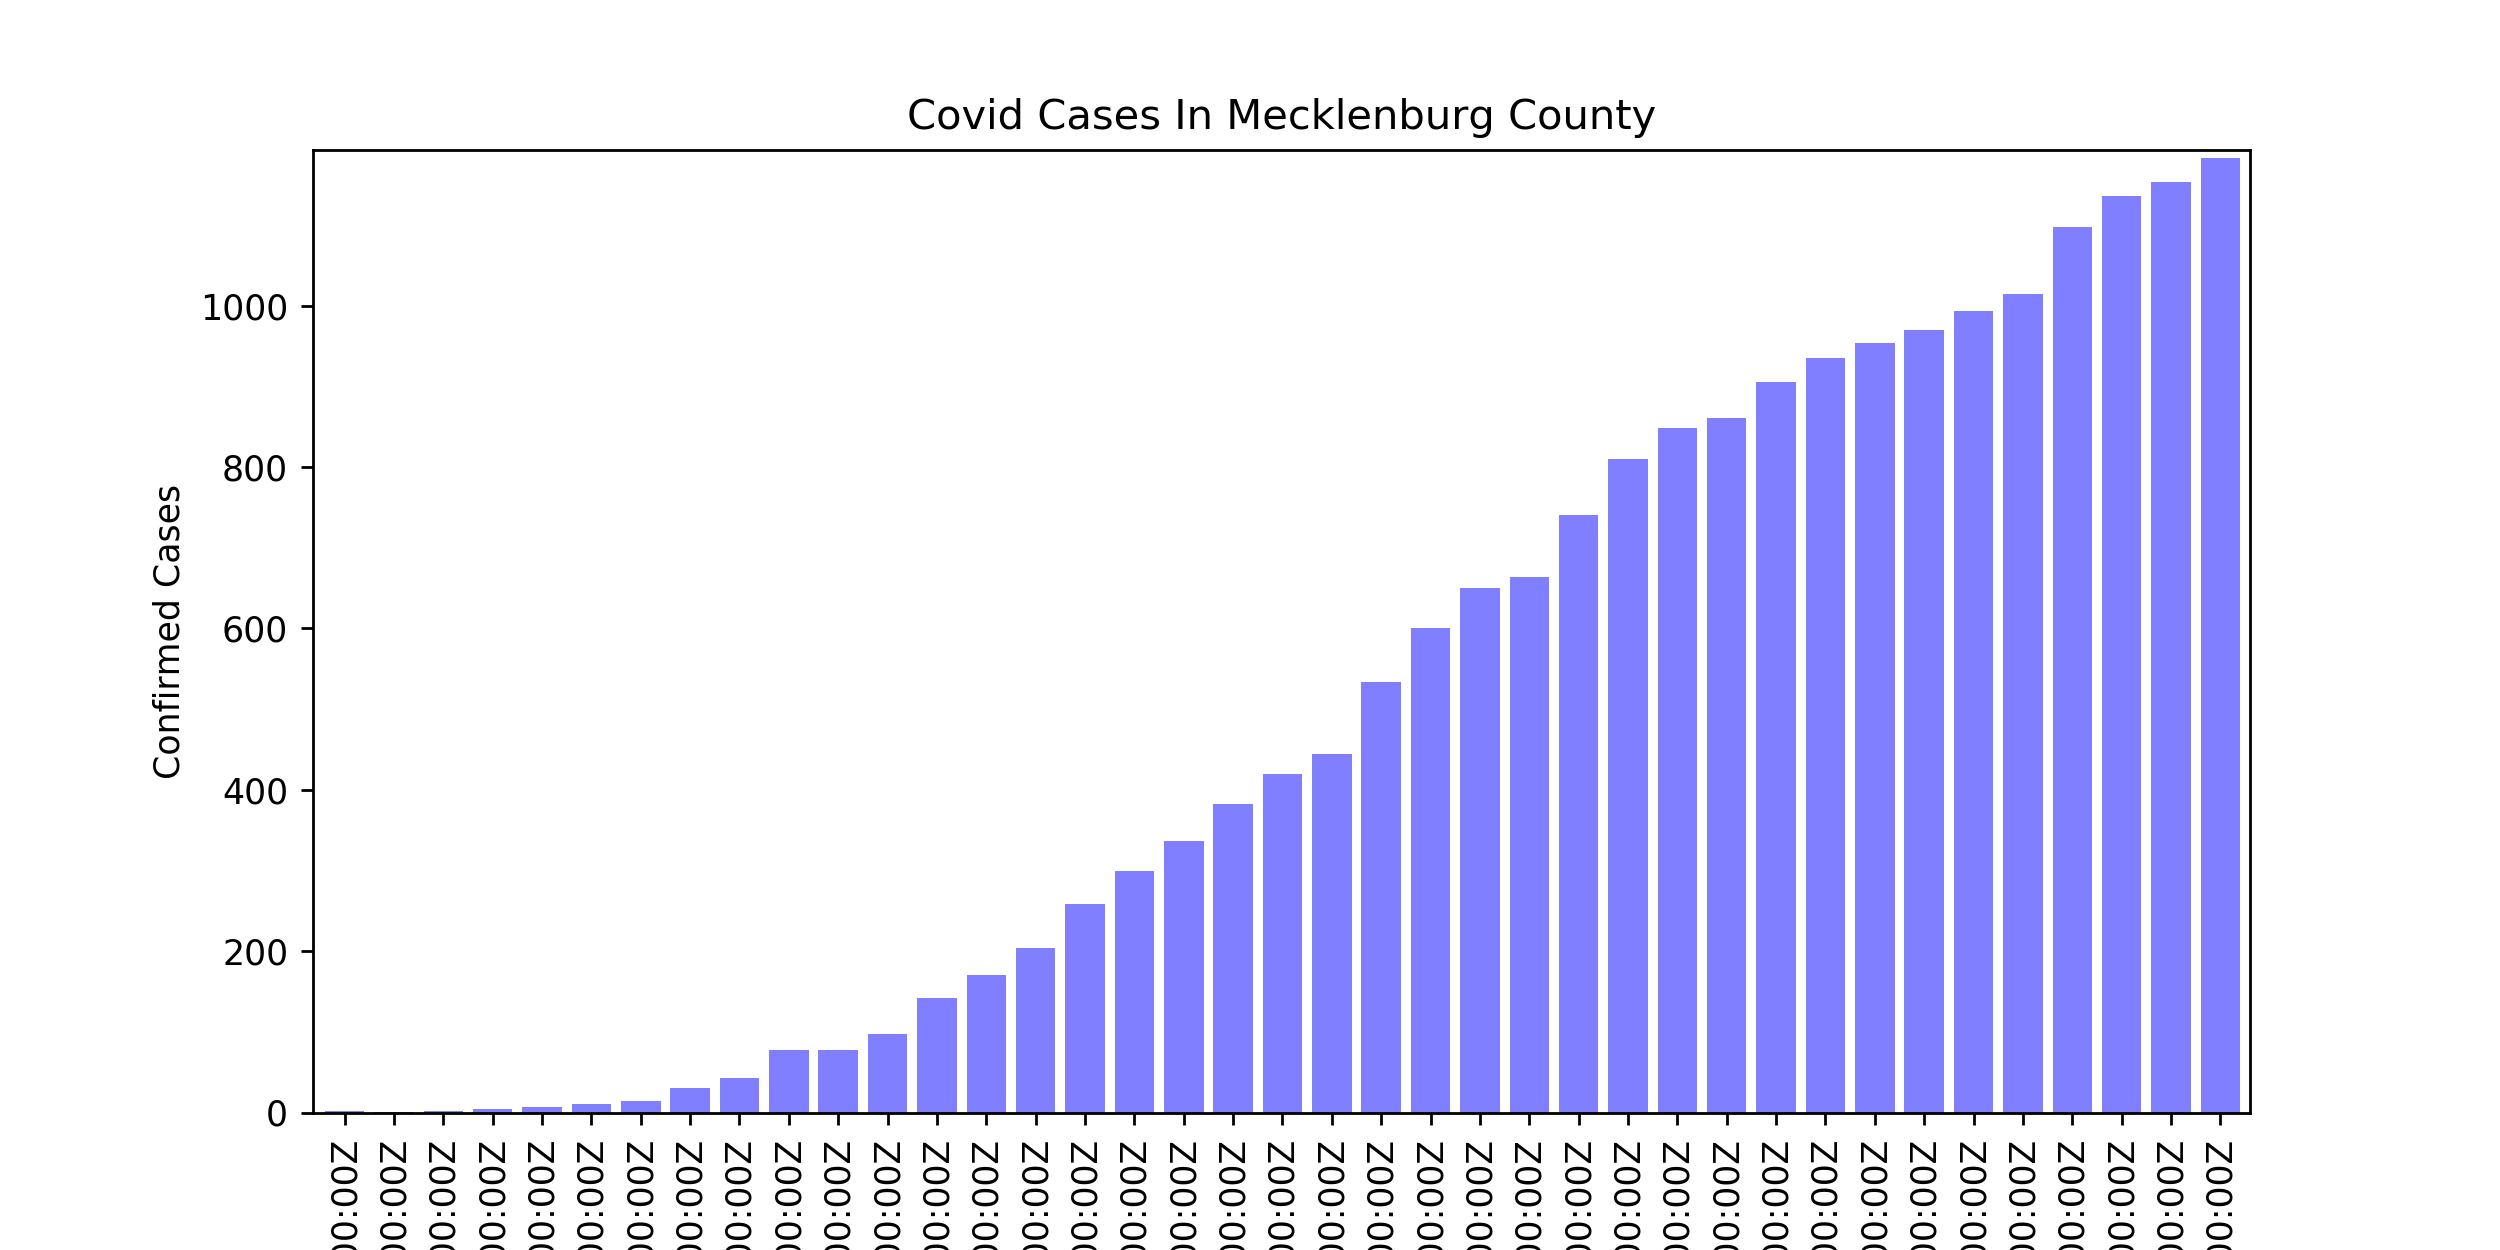

Text(0, 0.5, 'Confirmed Cases')

In [32]:
plt.figure(figsize=(10,5))
plt.bar(x_axis,nc_meck_df["Confirmed"],color='b',alpha=0.5,align="edge")
plt.xticks(tick_locations,nc_meck_df[("Date")],rotation="vertical")
plt.xlim(-0.25,len(x_axis))
plt.ylim(0,max(nc_meck_df["Confirmed"])+10)
plt.title("Covid Cases In Mecklenburg County")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")

         

In [11]:
x_limit = 100
x_axis = np.arange(0,x_limit,1)
nc_meck_df= [random.random() for value in x_axis]

In [12]:
plt.scatter(x_axis,nc_meck_df, marker ="o",facecolors = "red", edgecolors="black", s=x_axis , alpha=0.75)
plt.ylim(0,1)
plt.xlim(0,x_limit)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>